### Dependencies

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive

In [ ]:
prefix = '/content/drive'
from google.colab import drive
drive.mount(prefix, force_remount=True)

Mounted at /content/drive


In [ ]:
#Nancy
us_weekly_path = '/content/drive/MyDrive/545/545 group project/Data/weekly_housing_market_data_most_recent.tsv'


In [ ]:
# Yugui
#us_weekly_path = '/content/drive/MyDrive/545 group project/Data/weekly_housing_market_data_most_recent.tsv'

# US weekly housing market data

About this dataset: 

In this second part of our project, we use this US weekly housing market dataset that contains 98 columns and 1,663,455 rows to build a machine learning model to predict the sale price for US.

### Import and Clean the Data

In [ ]:
# for google drive

us_weekly_house_data = pd.read_csv(us_weekly_path, sep='\t')
us_weekly_house_data.head()

,region_id,region_type_id,region_name,region_type,period_begin,period_end,duration,total_homes_sold,total_homes_sold_yoy,average_homes_sold,average_homes_sold_yoy,total_homes_sold_with_price_drops,total_homes_sold_with_price_drops_yoy,average_homes_sold_with_price_drops,average_homes_sold_with_price_drops_yoy,percent_homes_sold_with_price_drops,percent_homes_sold_with_price_drops_yoy,median_sale_price,median_sale_price_yoy,median_sale_ppsf,median_sale_ppsf_yoy,median_days_to_close,median_days_to_close_yoy,price_drops,price_drops_yoy,percent_active_listings_with_price_drops,percent_active_listings_with_price_drops_yoy,pending_sales,pending_sales_yoy,median_pending_sqft,median_pending_sqft_yoy,off_market_in_two_weeks,off_market_in_two_weeks_yoy,off_market_in_one_week,off_market_in_one_week_yoy,percent_off_market_in_two_weeks,percent_off_market_in_two_weeks_yoy,percent_off_market_in_one_week,percent_off_market_in_one_week_yoy,total_new_listings,...,percent_active_listings_delisted_yoy,median_active_list_price,median_active_list_price_yoy,median_active_list_ppsf,median_active_list_ppsf_yoy,average_of_median_list_price_amount,average_of_median_list_price_amount_yoy,average_of_median_offer_price_amount,average_of_median_offer_price_amount_yoy,avg_offer_to_list,avg_offer_to_list_yoy,average_sale_to_list_ratio,average_sale_to_list_ratio_yoy,median_days_on_market,median_days_on_market_yoy,pending_sales_to_sales_ratio,pending_sales_to_sales_ratio_yoy,months_of_supply,months_of_supply_yoy,average_pending_sales_listing_updates,average_pending_sales_listing_updates_yoy,percent_total_price_drops_of_inventory,percent_total_price_drops_of_inventory_yoy,percent_homes_sold_above_list,percent_homes_sold_above_list_yoy,price_drop_percent_of_old_list_price,price_drop_percent_of_old_list_price_yoy,last_updated,average_adjustment_average_homes_delisted,adjusted_average_homes_delisted,average_adjustment_average_homes_sold,adjusted_average_homes_sold,average_adjustment_average_new_listings,adjusted_average_new_listings,average_adjustment_pending_sales,adjusted_pending_sales,adjusted_average_homes_delisted_yoy,adjusted_average_homes_sold_yoy,adjusted_average_new_listings_yoy,adjusted_pending_sales_yoy
0,39860,-2,"Red Wing, MN metro area",metro,2019-04-01,2019-04-07,1 weeks,16.0,0.066667,16.0,0.066667,7.0,6.000000,7.0,6.000000,0.437500,0.370833,239250.0,-0.023071,111.682067,0.000809,39.5,13.5,4.0,-0.500000,0.026667,-0.021526,5.0,-0.500000,1344.0,-0.206846,4.0,1.000000,4.0,NaN,0.800000,0.600000,0.800000,0.800000,23.0,...,-0.017430,262500.0,0.066206,124.166075,0.050817,NaN,NaN,NaN,NaN,NaN,NaN,0.966529,-0.034813,71.0,43.0,0.312500,-0.354167,9.375000,-1.691667,11.0,-0.421053,0.028369,-0.024611,0.250000,0.050000,0.024088,-0.030882,2021-09-29 15:19:16,NaN,1.0,NaN,16.0,NaN,23.0,NaN,5.0,-0.750000,0.066667,0.277778,-0.500000
1,27460,-2,"Jamestown, NY metro area",metro,2019-11-04,2019-11-10,1 weeks,35.0,0.296296,35.0,0.296296,13.0,0.300000,13.0,0.300000,0.371429,0.001058,85000.0,0.025010,55.729209,0.199204,44.0,-4.0,25.0,2.125000,0.049020,0.032825,20.0,1.222222,1677.0,0.136179,5.0,NaN,3.0,NaN,0.250000,0.250000,0.150000,0.150000,23.0,...,0.001453,109000.0,-0.043020,69.330197,-0.007320,NaN,NaN,NaN,NaN,NaN,NaN,0.918547,-0.015365,75.0,4.0,0.571429,0.238095,14.571429,-3.724868,36.0,0.500000,0.052632,0.035789,0.057143,-0.091005,0.059378,-0.053362,2021-09-29 15:19:16,NaN,9.0,NaN,35.0,NaN,23.0,NaN,20.0,0.125000,0.296296,0.150000,1.222222
2,592,5,"Liberty County, GA",county,2020-01-27,2020-02-02,1 weeks,5.0,-0.375000,5.0,-0.375000,0.0,NaN,0.0,NaN,0.000000,0.000000,133400.0,0.030116,96.153846,0.186942,0.0,0.0,NaN,NaN,NaN,NaN,1.0,-0.833333,1669.0,0.262959,0.0,NaN,0.0,NaN,0.000000,0.000000,0.000000,0.000000,13.0,...,NaN,185350.0,0.066471,96.153846,0.064521,NaN,NaN,NaN,NaN,NaN,NaN,0.979622,-0.043394,140.0,65.0,0.200000,-0.550000,36.400000,10.400000,NaN,NaN,NaN,NaN,0.000000,-0.500000,NaN,NaN,2021-09-29 15:19:16,NaN,NaN,NaN,5.0,NaN,13.0,NaN,1.0,NaN,-0.375000,0.300000,-0.833333


In [ ]:
us_weekly_house_data.describe()

,region_id,region_type_id,total_homes_sold,total_homes_sold_yoy,average_homes_sold,average_homes_sold_yoy,total_homes_sold_with_price_drops,total_homes_sold_with_price_drops_yoy,average_homes_sold_with_price_drops,average_homes_sold_with_price_drops_yoy,percent_homes_sold_with_price_drops,percent_homes_sold_with_price_drops_yoy,median_sale_price,median_sale_price_yoy,median_sale_ppsf,median_sale_ppsf_yoy,median_days_to_close,median_days_to_close_yoy,price_drops,price_drops_yoy,percent_active_listings_with_price_drops,percent_active_listings_with_price_drops_yoy,pending_sales,pending_sales_yoy,median_pending_sqft,median_pending_sqft_yoy,off_market_in_two_weeks,off_market_in_two_weeks_yoy,off_market_in_one_week,off_market_in_one_week_yoy,percent_off_market_in_two_weeks,percent_off_market_in_two_weeks_yoy,percent_off_market_in_one_week,percent_off_market_in_one_week_yoy,total_new_listings,total_new_listings_yoy,average_new_listings,average_new_listings_yoy,median_new_listing_price,median_new_listing_price_yoy,...,percent_active_listings_delisted,percent_active_listings_delisted_yoy,median_active_list_price,median_active_list_price_yoy,median_active_list_ppsf,median_active_list_ppsf_yoy,average_of_median_list_price_amount,average_of_median_list_price_amount_yoy,average_of_median_offer_price_amount,average_of_median_offer_price_amount_yoy,avg_offer_to_list,avg_offer_to_list_yoy,average_sale_to_list_ratio,average_sale_to_list_ratio_yoy,median_days_on_market,median_days_on_market_yoy,pending_sales_to_sales_ratio,pending_sales_to_sales_ratio_yoy,months_of_supply,months_of_supply_yoy,average_pending_sales_listing_updates,average_pending_sales_listing_updates_yoy,percent_total_price_drops_of_inventory,percent_total_price_drops_of_inventory_yoy,percent_homes_sold_above_list,percent_homes_sold_above_list_yoy,price_drop_percent_of_old_list_price,price_drop_percent_of_old_list_price_yoy,average_adjustment_average_homes_delisted,adjusted_average_homes_delisted,average_adjustment_average_homes_sold,adjusted_average_homes_sold,average_adjustment_average_new_listings,adjusted_average_new_listings,average_adjustment_pending_sales,adjusted_pending_sales,adjusted_average_homes_delisted_yoy,adjusted_average_homes_sold_yoy,adjusted_average_new_listings_yoy,adjusted_pending_sales_yoy
count,1.663455e+06,1.663455e+06,1.463031e+06,1.376364e+06,1.463031e+06,1.376364e+06,1.463031e+06,974191.000000,1.463031e+06,883166.000000,1.463031e+06,1.376364e+06,1.463031e+06,1.376364e+06,1.460472e+06,1.372981e+06,1.463031e+06,1.376364e+06,1.110003e+06,1.001837e+06,1.109895e+06,1.001818e+06,1.328820e+06,1.218874e+06,1.326102e+06,1.215135e+06,1.328820e+06,767237.000000,1.328820e+06,670759.000000,1.328820e+06,1.218874e+06,1.328820e+06,1.218874e+06,1.512498e+06,1.422857e+06,1.512498e+06,1.422857e+06,1.512013e+06,1.422345e+06,...,1.164054e+06,1.042177e+06,1.660729e+06,1.607850e+06,1.658742e+06,1.604633e+06,2.979900e+05,223063.000000,2.938390e+05,219849.000000,293640.000000,219634.000000,1.460681e+06,1.373746e+06,1.456843e+06,1.368043e+06,1.299150e+06,1.196783e+06,1.459816e+06,1.374209e+06,1.147751e+06,1.030516e+06,1.109910e+06,1.001833e+06,1.463031e+06,1.376364e+06,1.110003e+06,1.001837e+06,1598.000000,1.164054e+06,1619.000000,1.463031e+06,1624.000000,1.512498e+06,1604.000000,1.328820e+06,1.042177e+06,1.376364e+06,1.422857e+06,1.218874e+06
mean,8.807005e+03,3.243434e+00,5.904506e+02,3.770727e-01,1.056024e+02,2.130660e-01,1.445586e+02,0.392163,2.563129e+01,0.039231,2.016897e-01,-1.016858e-02,2.317768e+05,6.199667e-01,1.367549e+02,5.585784e-01,2.057212e+01,8.031130e-01,6.769287e+01,1.369372e-01,4.605034e-02,3.451797e-04,8.052994e+01,3.731513e-01,1.734312e+03,8.318104e-02,3.172569e+01,0.472425,2.182964e+01,0.495670,2.850069e-01,4.048480e-02,1.944498e-01,3.518442e-02,6.632401e+02,4.493037e-01,1.187286e+02,2.649859e-01,2.644960e+05,1.795592e-01,...,2.784737e-02,2.077851e-04,2.813569e+05,4.077403e-01,1.819470e+04,3.764467e+02,4.390716e+05,0.103052,4.463017e+05,4.692284,0.984789,

In [ ]:
us_weekly_house_data.columns

Index(['region_id', 'region_type_id', 'region_name', 'region_type',
       'period_begin', 'period_end', 'duration', 'total_homes_sold',
       'total_homes_sold_yoy', 'average_homes_sold', 'average_homes_sold_yoy',
       'total_homes_sold_with_price_drops',
       'total_homes_sold_with_price_drops_yoy',
       'average_homes_sold_with_price_drops',
       'average_homes_sold_with_price_drops_yoy',
       'percent_homes_sold_with_price_drops',
       'percent_homes_sold_with_price_drops_yoy', 'median_sale_price',
       'median_sale_price_yoy', 'median_sale_ppsf', 'median_sale_ppsf_yoy',
       'median_days_to_close', 'median_days_to_close_yoy', 'price_drops',
       'price_drops_yoy', 'percent_active_listings_with_price_drops',
       'percent_active_listings_with_price_drops_yoy', 'pending_sales',
       'pending_sales_yoy', 'median_pending_sqft', 'median_pending_sqft_yoy',
       'off_market_in_two_weeks', 'off_market_in_two_weeks_yoy',
       'off_market_in_one_week', 'off_market

In [ ]:
us_weekly_house_data.shape

(1663455, 98)

This dataset has 1,761,969 instances and 98 features.

In [ ]:
us_weekly_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1663455 entries, 0 to 1663454
Data columns (total 98 columns):
 #   Column                                        Non-Null Count    Dtype  
---  ------                                        --------------    -----  
 0   region_id                                     1663455 non-null  int64  
 1   region_type_id                                1663455 non-null  int64  
 2   region_name                                   1663455 non-null  object 
 3   region_type                                   1663455 non-null  object 
 4   period_begin                                  1663455 non-null  object 
 5   period_end                                    1663455 non-null  object 
 6   duration                                      1663455 non-null  object 
 7   total_homes_sold                              1463031 non-null  float64
 8   total_homes_sold_yoy                          1376364 non-null  float64
 9   average_homes_sold                 

Check the missing values for each columns. 

In [ ]:
#find percentage of missing values for each column
us_house_missing = us_weekly_house_data.isnull().mean()*100

#filter out only columns, which have missing values
us_house_col_nan = us_house_missing[us_house_missing > 0]

us_house_col_nan.sort_values(ascending=False)


average_adjustment_average_homes_delisted    99.903935
average_adjustment_pending_sales             99.903574
average_adjustment_average_homes_sold        99.902672
average_adjustment_average_new_listings      99.902372
avg_offer_to_list_yoy                        86.796517
                                               ...    
age_of_inventory                              0.240463
inventory                                     0.240463
median_active_list_price                      0.163876
total_active_listings                         0.135922
active_listings                               0.135922
Length: 90, dtype: float64

Convert "period_begin","period_end" columns from object to datetime

In [ ]:
us_weekly_house_data['period_begin']=pd.to_datetime(us_weekly_house_data['period_begin'])
us_weekly_house_data['period_end']= pd.to_datetime(us_weekly_house_data['period_end'])
us_weekly_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1663455 entries, 0 to 1663454
Data columns (total 98 columns):
 #   Column                                        Non-Null Count    Dtype         
---  ------                                        --------------    -----         
 0   region_id                                     1663455 non-null  int64         
 1   region_type_id                                1663455 non-null  int64         
 2   region_name                                   1663455 non-null  object        
 3   region_type                                   1663455 non-null  object        
 4   period_begin                                  1663455 non-null  datetime64[ns]
 5   period_end                                    1663455 non-null  datetime64[ns]
 6   duration                                      1663455 non-null  object        
 7   total_homes_sold                              1463031 non-null  float64       
 8   total_homes_sold_yoy                      

In [ ]:
us_weekly_house_data['region_id'].value_counts()

2047     727
2392     727
2394     727
31060    727
13660    727
        ... 
2795      57
2251      47
2857      41
626       30
535       28
Name: region_id, Length: 2422, dtype: int64

In [ ]:
us_weekly_house_data['region_name'].value_counts()

Centralia, WA metro area         727
Crawfordsville, IN metro area    727
Benton County, OR                727
McLeod County, MN                727
Harris County, GA                727
                                ... 
McMullen County, TX               57
Beaver County, OK                 47
Sutton County, TX                 41
Schley County, GA                 30
Clinch County, GA                 28
Name: region_name, Length: 2422, dtype: int64

check numerical_feature and categorical features of the us_weekly_house_data df

In [ ]:
numerical_feats = us_weekly_house_data.dtypes[us_weekly_house_data.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = us_weekly_house_data.dtypes[us_weekly_house_data.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  94
Number of Categorical features:  4


In [ ]:
print(us_weekly_house_data[numerical_feats].columns)
print("*"*100)
print(us_weekly_house_data[categorical_feats].columns)

Index(['region_id', 'region_type_id', 'period_begin', 'period_end',
       'total_homes_sold', 'total_homes_sold_yoy', 'average_homes_sold',
       'average_homes_sold_yoy', 'total_homes_sold_with_price_drops',
       'total_homes_sold_with_price_drops_yoy',
       'average_homes_sold_with_price_drops',
       'average_homes_sold_with_price_drops_yoy',
       'percent_homes_sold_with_price_drops',
       'percent_homes_sold_with_price_drops_yoy', 'median_sale_price',
       'median_sale_price_yoy', 'median_sale_ppsf', 'median_sale_ppsf_yoy',
       'median_days_to_close', 'median_days_to_close_yoy', 'price_drops',
       'price_drops_yoy', 'percent_active_listings_with_price_drops',
       'percent_active_listings_with_price_drops_yoy', 'pending_sales',
       'pending_sales_yoy', 'median_pending_sqft', 'median_pending_sqft_yoy',
       'off_market_in_two_weeks', 'off_market_in_two_weeks_yoy',
       'off_market_in_one_week', 'off_market_in_one_week_yoy',
       'percent_off_market_in_

Drop columns that are unrelated to our analysis

In [ ]:
us_house_df = us_weekly_house_data[['region_id','region_type_id','region_name','period_begin','total_homes_sold','average_homes_sold', 
'percent_homes_sold_with_price_drops', 'median_sale_price', 'median_sale_ppsf', 'price_drops', 'percent_active_listings_with_price_drops', 'pending_sales', 
'median_pending_sqft', 'off_market_in_two_weeks', 'off_market_in_one_week','total_new_listings','average_new_listings', 'median_new_listing_price', 
'median_new_listing_ppsf', 'avg_offer_to_list', 'average_sale_to_list_ratio']]

In [ ]:
us_house_df = us_house_df.dropna()
us_house_df = us_house_df.drop_duplicates()

In [ ]:
us_house_df.head()

,region_id,region_type_id,region_name,period_begin,total_homes_sold,average_homes_sold,percent_homes_sold_with_price_drops,median_sale_price,median_sale_ppsf,price_drops,percent_active_listings_with_price_drops,pending_sales,median_pending_sqft,off_market_in_two_weeks,off_market_in_one_week,total_new_listings,average_new_listings,median_new_listing_price,median_new_listing_ppsf,avg_offer_to_list,average_sale_to_list_ratio
6,220,5,"Maricopa County, AZ",2020-11-02,1611.0,1611.0,0.173805,350000.0,197.518031,548.0,0.038807,1477.0,1790.5,504.0,366.0,1784.0,1784.0,349900.0,201.581712,0.991901,0.997008
15,2190,5,"Hamilton County, OH",2018-11-26,270.0,270.0,0.348148,146700.0,100.120982,135.0,0.036546,190.0,1477.5,4.0,3.0,212.0,212.0,145000.0,97.531982,0.961089,0.965656
18,1312,5,"Baltimore County, MD",2017-06-26,393.0,393.0,0.137405,256000.0,152.239231,99.0,0.031721,172.0,1700.0,78.0,49.0,312.0,312.0,239900.0,150.183650,0.965755,0.985832
30,488,5,"Pinellas County, FL",2019-12-02,426.0,426.0,0.387324,265000.0,174.005359,335.0,0.065609,305.0,1343.0,132.0,85.0,428.0,428.0,260000.0,181.609195,0.971580,0.967601
40,2885,5,"Williamson County, TX",2020-03-16,252.0,252.0,0.230159,300695.0,144.757469,95.0,0.042392,197.0,2136.0,119.0,96.0,313.0,313.0,309000.0,149.466603,0.983245,0.992872


Split region name into county and state. 

In [ ]:
us_house_df['county'] = us_house_df['region_name'].apply(lambda x: x.split(', ')[0])
us_house_df['state'] = us_house_df['region_name'].apply(lambda x: x.split(', ')[-1])
us_house_df['state'] = us_house_df['state'].apply(lambda x: x.split(' ')[0])
us_house_df.head()

,region_id,region_type_id,region_name,period_begin,total_homes_sold,average_homes_sold,percent_homes_sold_with_price_drops,median_sale_price,median_sale_ppsf,price_drops,percent_active_listings_with_price_drops,pending_sales,median_pending_sqft,off_market_in_two_weeks,off_market_in_one_week,total_new_listings,average_new_listings,median_new_listing_price,median_new_listing_ppsf,avg_offer_to_list,average_sale_to_list_ratio,county,state
6,220,5,"Maricopa County, AZ",2020-11-02,1611.0,1611.0,0.173805,350000.0,197.518031,548.0,0.038807,1477.0,1790.5,504.0,366.0,1784.0,1784.0,349900.0,201.581712,0.991901,0.997008,Maricopa County,AZ
15,2190,5,"Hamilton County, OH",2018-11-26,270.0,270.0,0.348148,146700.0,100.120982,135.0,0.036546,190.0,1477.5,4.0,3.0,212.0,212.0,145000.0,97.531982,0.961089,0.965656,Hamilton County,OH
18,1312,5,"Baltimore County, MD",2017-06-26,393.0,393.0,0.137405,256000.0,152.239231,99.0,0.031721,172.0,1700.0,78.0,49.0,312.0,312.0,239900.0,150.183650,0.965755,0.985832,Baltimore County,MD
30,488,5,"Pinellas County, FL",2019-12-02,426.0,426.0,0.387324,265000.0,174.005359,335.0,0.065609,305.0,1343.0,132.0,85.0,428.0,428.0,260000.0,181.609195,0.971580,0.967601,Pinellas County,FL
40,2885,5,"Williamson County, TX",2020-03-16,252.0,252.0,0.230159,300695.0,144.757469,95.0,0.042392,197.0,2136.0,119.0,96.0,313.0,313.0,309000.0,149.466603,0.983245,0.992872,Williamson County,TX


In [ ]:
state_num = us_house_df['state'].groupby(us_house_df['state']).count()
print(state_num)

state
AK       212
AL      2199
AR       755
AZ      3740
All      727
CA     27257
CO      9537
CT      3650
DC      1454
DE      1224
FL     20819
GA      1272
HI      1740
IA       566
ID       611
IL      7587
IN      3064
KS      1008
KY      3390
LA      3761
MA      7207
MD     11598
ME      1585
MI      9715
MN      5549
MO      1185
MS        32
NC      8610
NE      1951
NH      4690
NJ     13363
NM      1904
NV      3981
NY      6771
OH      9583
OK      3567
OR      6157
PA      9835
RI      2614
SC      5707
TN      9447
TX     10152
UT      5111
VA     15149
VT        34
WA     13383
WI      6147
WV        17
Name: state, dtype: int64


Split period begin time into year, month, and day.

In [ ]:
us_house_df['year'] = us_house_df['period_begin'].apply(lambda x: x.year)
us_house_df['month'] = us_house_df['period_begin'].apply(lambda x: x.month)
us_house_df['day'] = us_house_df['period_begin'].apply(lambda x: x.day)

In [ ]:
us_house_df.drop(['region_name', 'period_begin'], axis=1, inplace=True)
us_house_df.head()

,region_id,region_type_id,total_homes_sold,average_homes_sold,percent_homes_sold_with_price_drops,median_sale_price,median_sale_ppsf,price_drops,percent_active_listings_with_price_drops,pending_sales,median_pending_sqft,off_market_in_two_weeks,off_market_in_one_week,total_new_listings,average_new_listings,median_new_listing_price,median_new_listing_ppsf,avg_offer_to_list,average_sale_to_list_ratio,county,state,year,month,day
6,220,5,1611.0,1611.0,0.173805,350000.0,197.518031,548.0,0.038807,1477.0,1790.5,504.0,366.0,1784.0,1784.0,349900.0,201.581712,0.991901,0.997008,Maricopa County,AZ,2020,11,2
15,2190,5,270.0,270.0,0.348148,146700.0,100.120982,135.0,0.036546,190.0,1477.5,4.0,3.0,212.0,212.0,145000.0,97.531982,0.961089,0.965656,Hamilton County,OH,2018,11,26
18,1312,5,393.0,393.0,0.137405,256000.0,152.239231,99.0,0.031721,172.0,1700.0,78.0,49.0,312.0,312.0,239900.0,150.183650,0.965755,0.985832,Baltimore County,MD,2017,6,26
30,488,5,426.0,426.0,0.387324,265000.0,174.005359,335.0,0.065609,305.0,1343.0,132.0,85.0,428.0,428.0,260000.0,181.609195,0.971580,0.967601,Pinellas County,FL,2019,12,2
40,2885,5,252.0,252.0,0.230159,300695.0,144.757469,95.0,0.042392,197.0,2136.0,119.0,96.0,313.0,313.0,309000.0,149.466603,0.983245,0.992872,Williamson County,TX,2020,3,16


In [ ]:
#### save a copy of us_house_df
us_house_df_cpy = us_house_df.copy()

Plot the distribution of data among states.

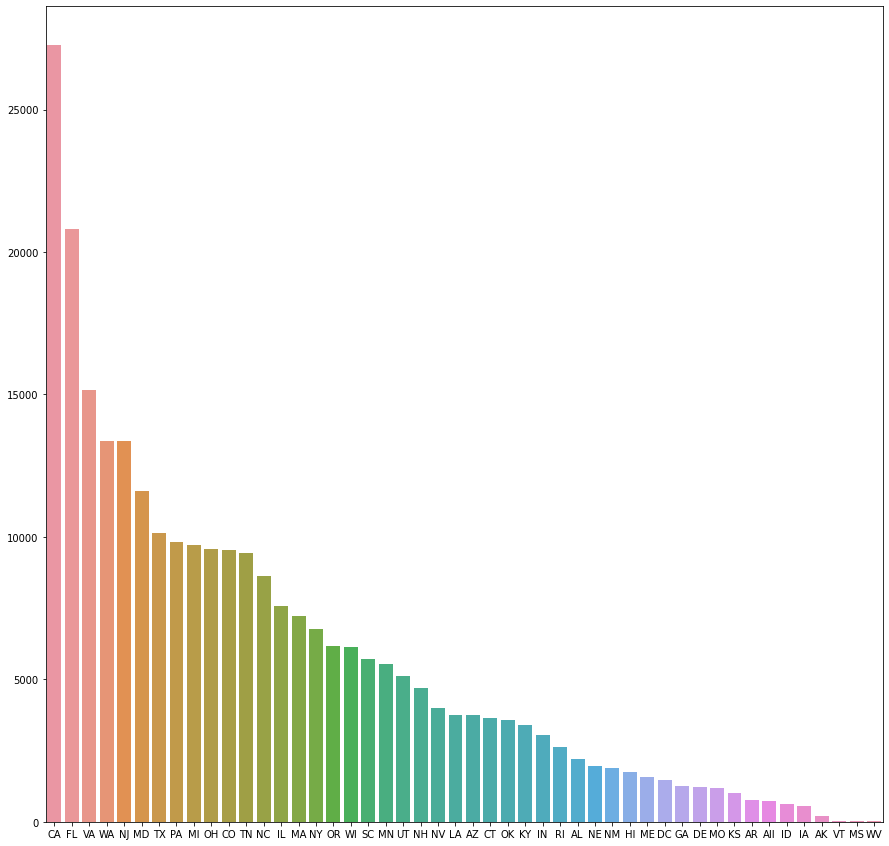

In [ ]:
plt.figure(figsize=(15,15))
state_distribution = us_house_df['state'].value_counts()
sns.barplot(x=state_distribution.index, y=state_distribution.values, order=state_distribution.index)
plt.show()

Plot the distribution of data among years.

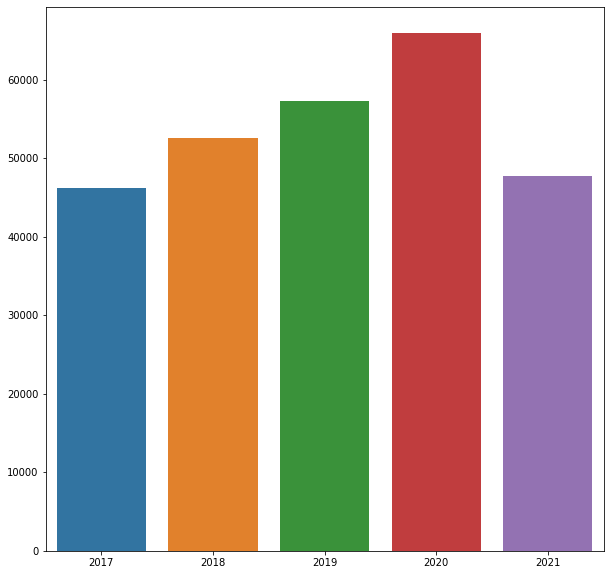

In [ ]:
plt.figure(figsize=(10,10))
year_distribution = us_house_df['year'].value_counts().sort_index()
sns.barplot(x=year_distribution.index, y=year_distribution.values, order=year_distribution.index)
plt.show()

Plot the data distribution for every month.

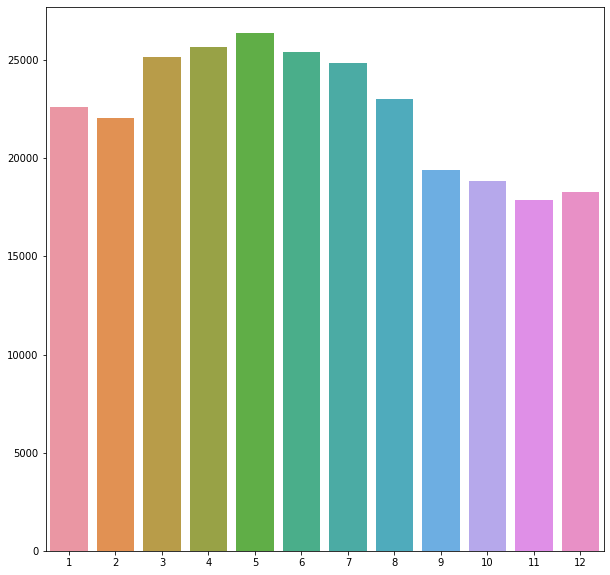

In [ ]:
plt.figure(figsize=(10,10))
month_distribution = us_house_df['month'].value_counts().sort_index()
sns.barplot(x=month_distribution.index, y=month_distribution.values, order=month_distribution.index)
plt.show()

Plot the trend of the median sold price for every year.

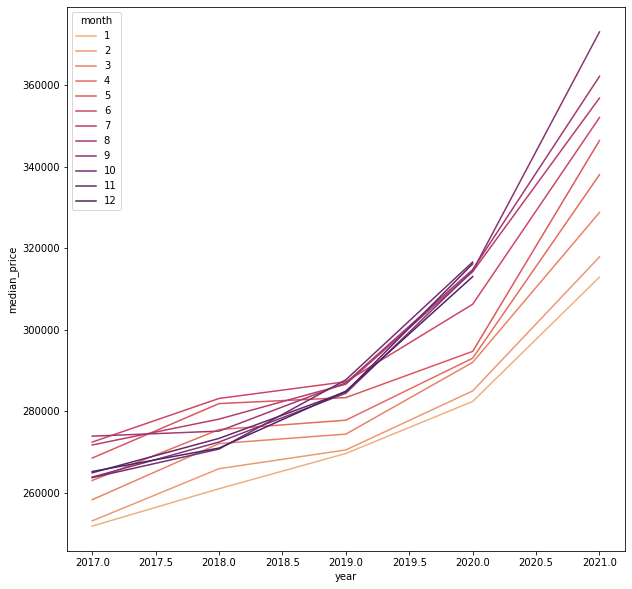

In [ ]:
plt.figure(figsize=(10, 10))
price_trend = us_house_df.groupby(['year', 'month']).agg({'median_sale_price': ['median']})
price_trend.columns = ['median_price']
price_trend = price_trend.reset_index()
palette = sns.color_palette("flare", as_cmap=True)
sns.lineplot(data=price_trend, x='year', y='median_price', hue='month', palette=palette, legend='full')
plt.show()

Correlation heatmap of numeric columns:

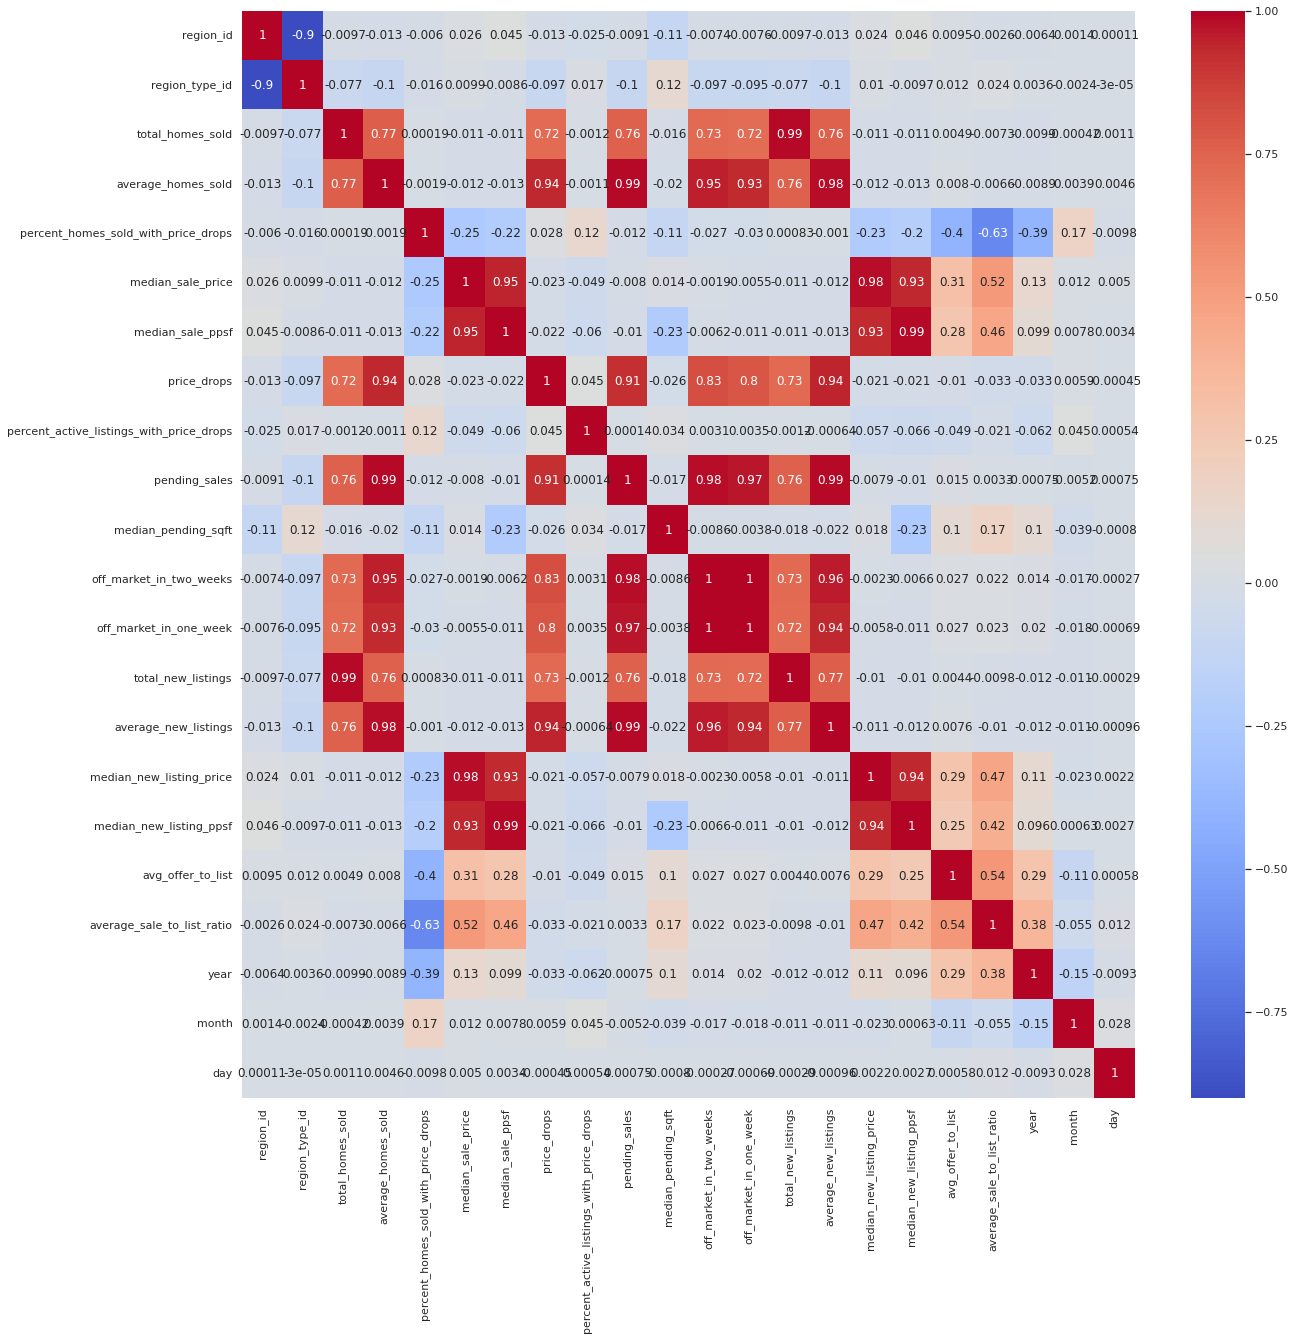

In [ ]:
sns.set(style = 'white')
corr= us_house_df.corr()

plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot= True, fmt='.2g', cmap='coolwarm')
plt.show()


### Preprocess features &amp; Standardize Scale

In [ ]:
us_house_df.shape

(269617, 24)

In [ ]:
us_house_df.dtypes

region_id                                     int64
region_type_id                                int64
total_homes_sold                            float64
average_homes_sold                          float64
percent_homes_sold_with_price_drops         float64
median_sale_price                           float64
median_sale_ppsf                            float64
price_drops                                 float64
percent_active_listings_with_price_drops    float64
pending_sales                               float64
median_pending_sqft                         float64
off_market_in_two_weeks                     float64
off_market_in_one_week                      float64
total_new_listings                          float64
average_new_listings                        float64
median_new_listing_price                    float64
median_new_listing_ppsf                     float64
avg_offer_to_list                           float64
average_sale_to_list_ratio                  float64
county      

Only use the state info, convert 'state' to one hot vectors, drop county. Then drop all columns that has hight correlation with 'median sale price' and 'total new listing'.

In [ ]:
# us_house_df.state = us_house_df.astype("Object")
us_house_coded = us_house_df[us_house_df["state"] != "ALL"].copy()
us_state_ohv = pd.get_dummies(us_house_coded['state'])

# drop columns including region_id, region_type_id, day 
us_house_coded = us_house_coded.drop(columns=['average_homes_sold', 'median_sale_ppsf','county','state','region_id','region_type_id','day', 'county', 'average_sale_to_list_ratio', 'median_new_listing_price', 'median_new_listing_ppsf', 'average_new_listings'])

#us_house_df = pd.concat([us_house_df, us_county_ohv, us_state_ohv], axis=1)
us_house_coded = pd.concat([us_house_coded, us_state_ohv], axis=1)
us_house_coded.head()

,total_homes_sold,percent_homes_sold_with_price_drops,median_sale_price,price_drops,percent_active_listings_with_price_drops,pending_sales,median_pending_sqft,off_market_in_two_weeks,off_market_in_one_week,total_new_listings,avg_offer_to_list,year,month,AK,AL,AR,AZ,All,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,NC,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,TN,TX,UT,VA,VT,WA,WI,WV
6,1611.0,0.173805,350000.0,548.0,0.038807,1477.0,1790.5,504.0,366.0,1784.0,0.991901,2020,11,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,270.0,0.348148,146700.0,135.0,0.036546,190.0,1477.5,4.0,3.0,212.0,0.961089,2018,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
18,393.0,0.137405,256000.0,99.0,0.031721,172.0,1700.0,78.0,49.0,312.0,0.965755,2017,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30,426.0,0.387324,265000.0,335.0,0.065609,305.0,1343.0,132.0,85.0,428.0,0.971580,2019,12,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40,252.0,0.230159,300695.0,95.0,0.042392,197.0,2136.0,119.0,96.0,313.0,0.983245,2020,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# save a copy of us_house_df after one hot vectors
us_house_ohv_cpy = us_house_coded.copy()

In [ ]:
us_house_ohv_cpy.head()

,total_homes_sold,percent_homes_sold_with_price_drops,median_sale_price,price_drops,percent_active_listings_with_price_drops,pending_sales,median_pending_sqft,off_market_in_two_weeks,off_market_in_one_week,total_new_listings,avg_offer_to_list,year,month,AK,AL,AR,AZ,All,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,NC,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,TN,TX,UT,VA,VT,WA,WI,WV
6,1611.0,0.173805,350000.0,548.0,0.038807,1477.0,1790.5,504.0,366.0,1784.0,0.991901,2020,11,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,270.0,0.348148,146700.0,135.0,0.036546,190.0,1477.5,4.0,3.0,212.0,0.961089,2018,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
18,393.0,0.137405,256000.0,99.0,0.031721,172.0,1700.0,78.0,49.0,312.0,0.965755,2017,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30,426.0,0.387324,265000.0,335.0,0.065609,305.0,1343.0,132.0,85.0,428.0,0.971580,2019,12,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40,252.0,0.230159,300695.0,95.0,0.042392,197.0,2136.0,119.0,96.0,313.0,0.983245,2020,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Modeling

We are ready to train the model and predict the result using the dataset we preprocessed above. There are two columns that could be used as label to predict, first one is 'median_sale_price', second one is 'new_house_listing'. 

Firstly, we use 'median_sale_price' as label, to predict the median sale price for the whole country. 

In [ ]:
label = us_house_ohv_cpy['median_sale_price']
features = us_house_ohv_cpy.drop(columns = 'median_sale_price')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=.2, random_state=42)

### Linear Regression 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import matplotlib

clf = LinearRegression()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
score = r2_score(y_test, y_pred)

print("Score:", score)

# Different error measures
print("MAE:", mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

Score: 0.5525588564283712
MAE: 78566.05190166579
MSE: 16366838033.862299
RMSE: 127932.9435050343


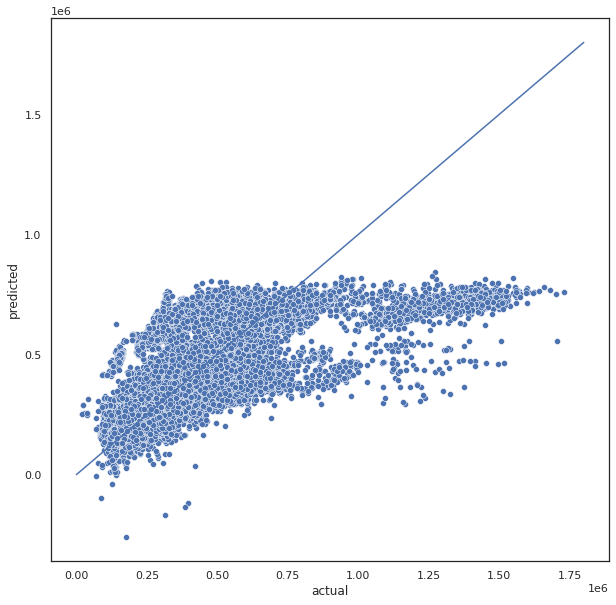

In [ ]:
plt.figure(figsize=(10, 10))
p = sns.scatterplot(x=y_test, y=y_pred)
sns.lineplot(x=[0, 1800000], y=[0, 1800000])
p.set_xlabel("actual")
p.set_ylabel("predicted")
plt.show()

In [ ]:
print(clf.intercept_)
print(clf.coef_)

-19749915.136014562
[ 8.50515446e-01 -3.11566112e+05  3.89661706e+00 -2.13493197e+05
 -3.12360114e+01  5.57799466e+01  2.03648535e+02 -2.04460652e+02
 -7.23278365e-01  3.71823179e+05  9.73520343e+03  3.32523398e+03
  1.30283977e+03 -1.05658806e+05 -1.37627834e+05 -1.15102110e+04
  1.56952669e+05  3.61260361e+05  1.04767523e+05 -4.14261902e+03
  2.02193063e+05 -5.95741012e+04  1.50576437e+03 -7.56976199e+04
  3.26914292e+05 -4.83436659e+04  7.28277092e+04 -3.78172136e+04
 -8.67257525e+04 -7.64336714e+04 -9.48448462e+04 -5.35055210e+04
  1.38087337e+05  5.26446727e+03 -1.39299576e+04 -9.05199364e+04
 -3.97647674e+04 -9.94580392e+04 -1.92796157e+05 -5.24144419e+04
 -1.16384917e+05 -1.17172897e+04  2.98569583e+04  2.81846669e+04
  6.25051673e+04  2.01849499e+05 -9.61149721e+04 -1.08331282e+05
  9.30086983e+04 -5.37762709e+04  5.68151273e+03 -4.17092982e+04
 -5.73727321e+04 -3.25406448e+04  8.03323526e+04  3.95359154e+04
 -7.86802186e+03  7.36698969e+04 -5.97772514e+04 -1.19342851e+05]


### Linear Regression with PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
pca = PCA(n_components=x_train.shape[1])
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
evr = pca.explained_variance_ratio_
evr 

array([1.00816133e-01, 3.38763416e-02, 2.67514923e-02, 2.06219720e-02,
       1.92720026e-02, 1.83568864e-02, 1.76963474e-02, 1.76304596e-02,
       1.75188154e-02, 1.74097172e-02, 1.74039733e-02, 1.73269932e-02,
       1.72926785e-02, 1.72752734e-02, 1.72436062e-02, 1.72015956e-02,
       1.71633178e-02, 1.70939810e-02, 1.70789428e-02, 1.70614026e-02,
       1.70432678e-02, 1.70288404e-02, 1.70107007e-02, 1.70024049e-02,
       1.69631199e-02, 1.69256091e-02, 1.69184865e-02, 1.69037403e-02,
       1.68937645e-02, 1.68891083e-02, 1.68634610e-02, 1.68394709e-02,
       1.68207255e-02, 1.67982940e-02, 1.67904566e-02, 1.67763609e-02,
       1.67655858e-02, 1.67509253e-02, 1.67455851e-02, 1.67429410e-02,
       1.67413100e-02, 1.67188708e-02, 1.67101205e-02, 1.66875623e-02,
       1.66742518e-02, 1.66709732e-02, 1.66686280e-02, 1.64984304e-02,
       1.43985223e-02, 1.33655686e-02, 1.05513719e-02, 9.34575242e-03,
       7.97948924e-03, 6.20368161e-03, 4.39593170e-03, 5.99389556e-04,
      

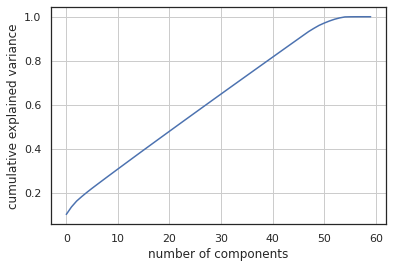

In [ ]:
# See how much is contributed by the first few terms
us_house_pc_vs_variance = np.cumsum(pca.explained_variance_ratio_)
us_house_pc_vs_variance
plt.plot(us_house_pc_vs_variance)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
# plt.plot(evr.cumsum())
plt.show()

In [ ]:
# PCA reduce
pca = PCA(.98)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
pca.n_components_

52

In [ ]:
# with PCA. Lasso
from sklearn.linear_model import Lasso

clf = Lasso()
clf.fit(x_train, y_train)

predictions = clf.predict(x_test)

print("Score:", clf.score(x_test, y_test))

# Different error measures
print("MAE:", mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

#print(clf.coef_)


Score: 0.5430104913638174
MAE: 80554.89266843958
MSE: 16716105298.942772
RMSE: 129290.77808932381


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normal Distribution of Error (TEST PRICE- PREDICTED PRICE)')

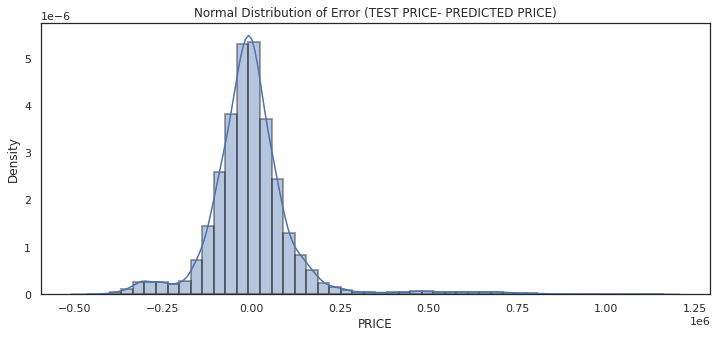

In [ ]:
# check the normal distribution of the error for Lasso
plt.figure(figsize=(12,5))
sns.distplot((y_test-predictions),bins=50,hist_kws=dict(edgecolor="k", linewidth=2));
plt.xlabel("PRICE")
plt.title("Normal Distribution of Error (TEST PRICE- PREDICTED PRICE)")


In [ ]:
from sklearn.linear_model import Ridge

clf = Ridge()
clf.fit(x_train, y_train)

predictions = clf.predict(x_test)

print("Score:", clf.score(x_test, y_test))

# Different error measures
print("MAE:", mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

Score: 0.5430105593152303
MAE: 80555.16829255223
MSE: 16716102813.364977
RMSE: 129290.76847696814


Text(0.5, 1.0, 'Relationship between test data and predicted data using Ridge')

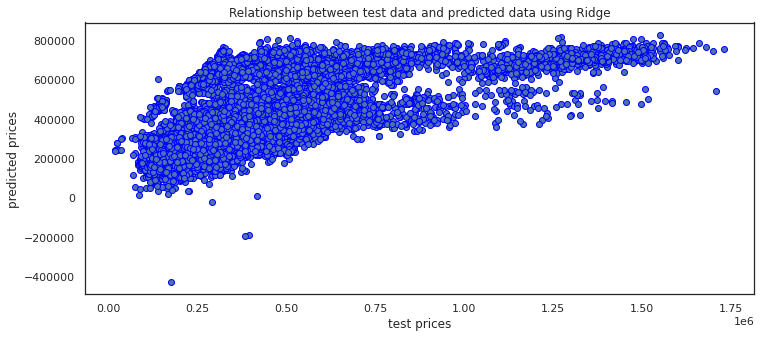

In [ ]:
# check the relationship between test data and the predicted data using Ridge
plt.figure(figsize=(12,5))
plt.scatter(x=y_test,y=predictions,edgecolors='blue')
plt.xlabel("test prices")
plt.ylabel("predicted prices")
plt.title("Relationship between test data and predicted data using Ridge")

In [ ]:
from sklearn.linear_model import ElasticNet

clf = ElasticNet()
clf.fit(x_train, y_train)

predictions = clf.predict(x_test)

print("Score:", clf.score(x_test, y_test))

# Different error measures
print("MAE:", mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

Score: 0.49691670291968515
MAE: 84798.10918627637
MSE: 18402158494.25304
RMSE: 135654.5557445567


Text(0.5, 1.0, 'Relationship between test data and predicted data using ElasticNet')

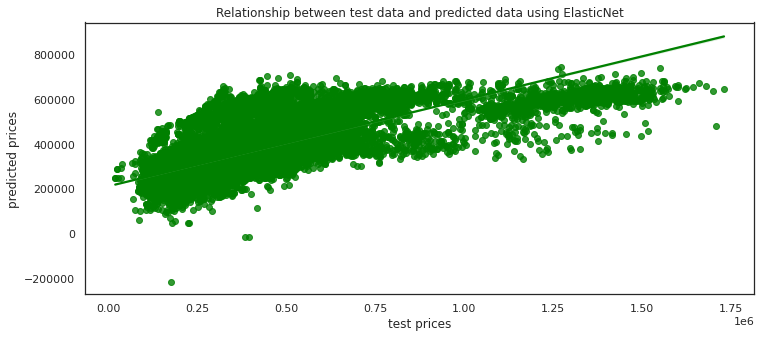

In [ ]:
# Relationship between test data and predicted data using ElasticNet
plt.figure(figsize=(12,5))
sns.regplot(x= y_test, y= predictions,color='green')
plt.xlabel("test prices")
plt.ylabel("predicted prices")
plt.title("Relationship between test data and predicted data using ElasticNet")

try to use total_new_listing as label

In [ ]:
us_house_ohv_cpy2 = us_house_coded.copy()
us_house_ohv_cpy2.drop("total_homes_sold", axis = 1, inplace=True)
label = us_house_ohv_cpy2['total_new_listings']
features = us_house_ohv_cpy2.drop(columns = 'total_new_listings')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=.2, random_state=42)

Score: 0.555451288443054
MAE: 2175.8879911615945
MSE: 385242589.7432464
RMSE: 19627.59765593452


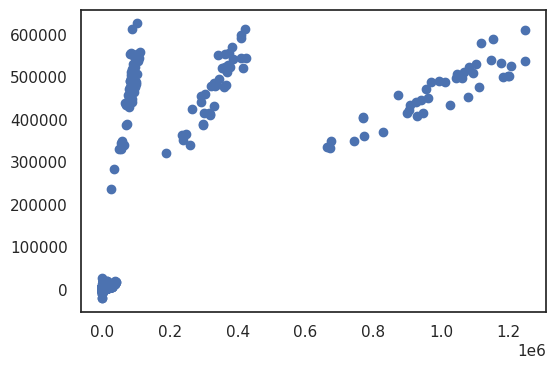

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import matplotlib

clf = LinearRegression()
clf.fit(x_train, y_train)

predictions = clf.predict(x_test)

print("Score:", clf.score(x_test, y_test))

plt.figure(dpi=100)
plt.scatter(y_test, predictions)

# Different error measures
print("MAE:", mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

## Summary for US housing price prediction




---


The original plan is using US_house_price dataset to predict house prices for next year. We used median sale price as label, and adopt Linear Regression to do the house price prediction. The results are shown as follows:
```
linear regression:         
         r2 = 0.5525588564283712, rmse = 127932.9435050343
linear regression with PCA and Lasso:  
         r2 = 0.5430104913638174, rmse = 129290.77808932381
linear regression with PCA and Ridge:  
         r2 = 0.5430105593152303, rmse = 129290.76847696814
linear regression with PCA and ElasticNet:  
         r2 = 0.49691670291968515, rmse = 135654.5557445567

```
But after we trained several models, we found out that the best score we could get using the linear regression is 0.55 with an error of 127k. 
Since the rmse is the standard deviation of a typical observed value from our model's prediction, then this extemely large rmse (above 127K) means that our linear regression model for US housing market may fail to account for some features underlying the data.

After carefully reanalysing this US house dataset, we realized that the features in this dataset may not be suitable for this prediction. There are too many correlations between features, but not many features that are related to the house itself. 

In that case, we tried to change our mind and try some different directions of study. The first direction is finding the relationship between the Texas house price trend and Austin house price. Second, we try to use a logistic model to predict whether for a specific state, the house price is going to increase or decrease in part3.



---



## Texas house price Prediction 

### Texas House Price Prediction

In [ ]:
tx_house_df = us_house_df[us_house_df['state'] == 'TX'].copy()
tx_house_df

,region_id,region_type_id,total_homes_sold,average_homes_sold,percent_homes_sold_with_price_drops,median_sale_price,median_sale_ppsf,price_drops,percent_active_listings_with_price_drops,pending_sales,median_pending_sqft,off_market_in_two_weeks,off_market_in_one_week,total_new_listings,average_new_listings,median_new_listing_price,median_new_listing_ppsf,avg_offer_to_list,average_sale_to_list_ratio,county,state,year,month,day
40,2885,5,252.0,252.0,0.230159,300695.0,144.757469,95.0,0.042392,197.0,2136.0,119.0,96.0,313.0,313.0,309000.0,149.466603,0.983245,0.992872,Williamson County,TX,2020,3,16
396,2885,5,235.0,235.0,0.378723,282500.0,144.805461,118.0,0.046844,197.0,2080.0,108.0,84.0,305.0,305.0,294990.0,141.539629,0.988096,0.983651,Williamson County,TX,2019,3,11
705,2866,5,421.0,421.0,0.289786,400000.0,202.592593,328.0,0.074512,386.0,1855.5,209.0,152.0,526.0,526.0,399250.0,211.446674,0.993762,0.990009,Travis County,TX,2019,6,17
758,2710,5,132.0,132.0,0.242424,157000.0,91.289361,95.0,0.035198,88.0,1766.0,29.0,23.0,170.0,170.0,144000.0,90.954913,1.000000,0.977141,El Paso County,TX,2018,9,3
1245,2744,5,86.0,86.0,0.186047,321132.5,161.769756,5.0,0.008065,71.0,1870.0,17.0,10.0,73.0,73.0,353680.0,173.048601,0.998302,0.991834,Hays County,TX,2020,12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658639,2785,5,179.0,14.0,0.354126,177467.9,105.486155,9.0,0.032654,12.0,1724.1,4.0,2.0,248.0,20.0,212050.1,121.582560,0.935484,0.967177,Liberty County,TX,2020,5,4
1658691,2785,5,202.0,16.0,0.266001,211597.9,120.075207,7.0,0.024676,10.0,1771.6,4.0,2.0,259.0,21.0,220499.8,126.840861,0.981481,0.975938,Liberty County,TX,2020,10,12
1658723,2785,5,218.0,18.0,0.269128,201003.3,119.120928,9.0,0.030756,12.0,1806.6,5.0,3.0,286.0,23.0,219058.8,125.015609,0.981481,0.971352,Liberty County,TX,2020,8,31
1658791,2785,5,205.0,17.0,0.262109,213102.9,121.192886,8.0,0.025941,10.0,1707.4,4.0,2.0,242.0,20.0,220056.5,124.045274,0.981481,0.976482,Liberty County,TX,2020,10,26


Check the number of sold houses in different counties in TX

In [ ]:
tx_county_house_count = tx_house_df['county'].value_counts().sort_values()
tx_county_house_count

Kleberg County           8
Kingsville               8
Jim Wells County        10
Alice                   10
Hudspeth County         14
Wharton County          17
Hopkins County          17
Erath County            17
El Campo                17
Stephenville            17
San Jacinto County      17
Sulphur Springs         17
Burnet County           17
Bell County             17
Killeen                 17
Grimes County           17
Huntsville              29
Walker County           29
Caldwell County         37
Gainesville             39
Cooke County            39
Rockport                47
Aransas County          47
Liberty County          51
Bonham                  66
Fannin County           66
San Patricio County     79
Granbury               106
Hood County            106
Chambers County        111
Grayson County         126
Sherman                126
Bastrop County         143
Waller County          182
McAllen                187
Hidalgo County         187
Nueces County          325
B

Plot the distribution of house sold number for different counties in Texas

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


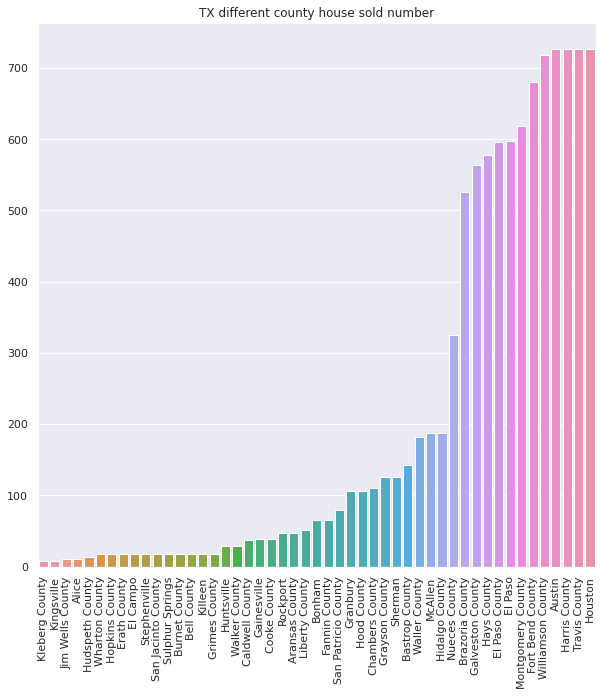

In [ ]:
plt.figure(figsize=(10,10))
county_house_num = sns.barplot(tx_county_house_count.index, tx_county_house_count.values, order= tx_county_house_count.index)
plt.title('TX different county house sold number')
for label in county_house_num.get_xticklabels():
    label.set_rotation(90)
plt.show()

From above plot, we could find that Austin, Harris County, Travis County and Houston has the highest number of sold houses. Since Travis County is in Greater Austin area, and Harris County is the county that includes all of the city of Houston and a number of other neighboring communities, Austin and Houston area's real estate market is the most active in recent years.

Check the housing data among years in TX

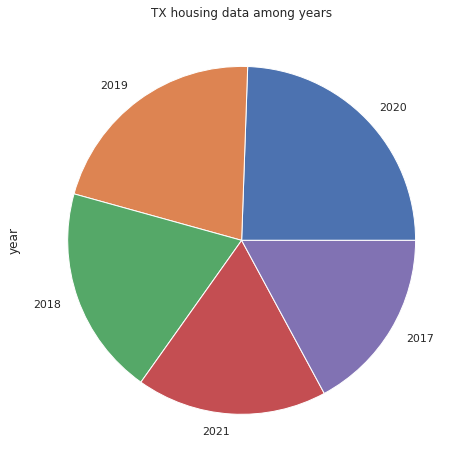

In [ ]:
plt.figure(figsize=(8,8))
plt.title('TX housing data among years')
tx_year_distribution = us_house_df['year'].value_counts()
tx_year_distribution.plot(kind = 'pie', subplots= True, figsize = (8,8))
plt.show()

Check the data distribution for each month in TX dataframe

<Figure size 720x720 with 0 Axes>

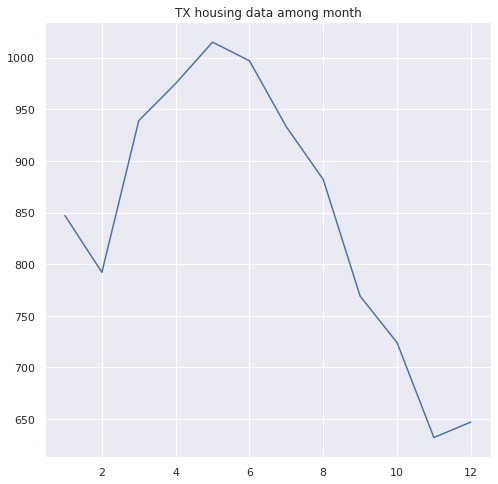

In [ ]:
plt.figure(figsize=(10,10))
tx_month_distribution = tx_house_df['month'].value_counts()
plt.figure(figsize=(8,8))
plt.title('TX housing data among month')
#sns.barplot(x=tx_month_distribution.index, y=tx_month_distribution.values, order=tx_month_distribution.index)
sns.lineplot(x=tx_month_distribution.index, y=tx_month_distribution.values)
plt.show()

From above Graph, we could find that the hottest month to sale a house in TX is in May, and the coldest month for housing market is November.

Check each year TX different counties' housing median sale price

In [ ]:
# check each year's house sold numbers 
tx_house_year = tx_house_df.groupby('county')['year'].value_counts()
print(tx_house_year)

county             year
Alice              2017     10
Aransas County     2017     17
                   2021     17
                   2018     13
Austin             2018    159
                          ... 
Williamson County  2018    158
                   2019    156
                   2020    156
                   2017    150
                   2021     99
Name: year, Length: 134, dtype: int64


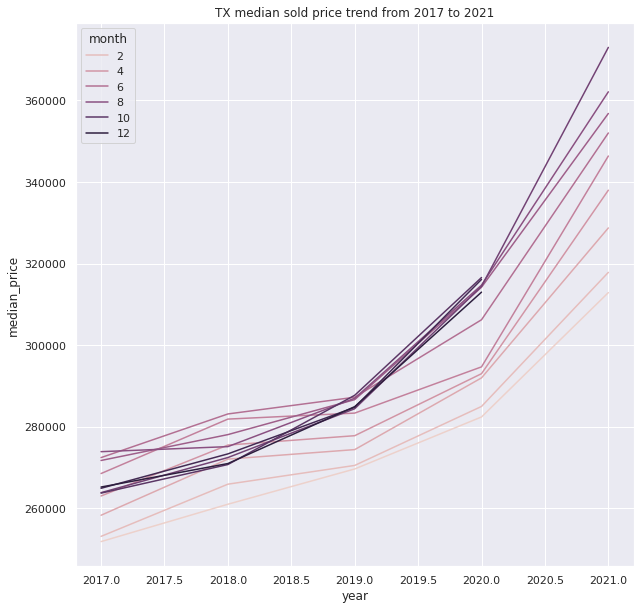

In [ ]:
plt.figure(figsize=(10, 10))
# price_trend['time'] = tx_house_df['year'].map(str) + ' '+ price_trend['month'].map(str)
tx_price_trend = tx_house_df.groupby(['year', 'month']).agg({'median_sale_price': ['median']})
tx_price_trend.columns = ['median_price']
tx_price_trend = price_trend.reset_index()

#palette = sns.color_palette("mako_r", as_cmap=True)
#sns.lineplot(data=tx_price_trend, x='year', y='median_price', hue='month', palette=palette, legend='full')

plt.title("TX median sold price trend from 2017 to 2021")
sns.set_theme(style='darkgrid')
sns.lineplot(data=tx_price_trend, x='year', y='median_price', hue='month')
plt.show()

From above graph, we noticed that in TX, all Texas counties' house meidan sale price is rising in recent years. Austum months (September, October, November) seems to have bigger increase in the median sold price from 2017 to 2021.

Check TX different counties median sale price per square feet

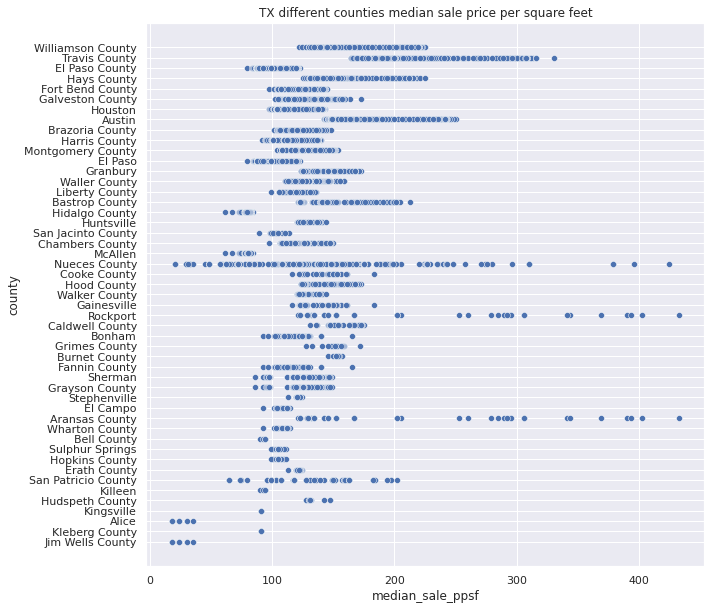

In [ ]:
plt.figure(figsize=(10, 10))
plt.title("TX different counties median sale price per square feet")
sns.scatterplot(data=tx_house_df, x='median_sale_ppsf', y='county')
plt.show()

Check the influncethe of meidan sale price on the number of house sold time in TX

<Figure size 936x864 with 0 Axes>

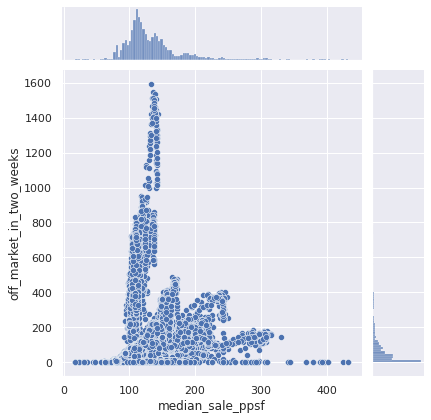

In [ ]:
plt.figure(figsize=(13, 12))
# sns.set(style ="whitegrid")
sns.jointplot(x="median_sale_ppsf", y="off_market_in_two_weeks", data=tx_house_df)
plt.show()

From above graph, we could see that the most easily sold house' price per square feet is between $100/ppsf and $150/ppsf. House around this price range ofen is most popular in Texas, and a large portion of them can be sold in two_weeks.

 **Train the model for Texas housing market**

1. Preprocess features & Standardize

First, convert categorical feature (i.e. "county") to one hot vectors:

In [ ]:
tx_house_county_ohv = pd.get_dummies(tx_house_df['county'])

# drop columns including region_id, region_type_id, day, state,ect.

tx_house_coded = tx_house_df.drop(columns=['average_homes_sold', 'median_sale_ppsf','county','state','region_id','region_type_id','day', 'county', 'average_sale_to_list_ratio', 'median_new_listing_price', 'median_new_listing_ppsf', 'average_new_listings'])

#us_house_df = pd.concat([us_house_df, us_county_ohv, us_state_ohv], axis=1)
tx_house_coded = pd.concat([tx_house_coded, tx_house_county_ohv], axis=1)
tx_house_coded.head()


,total_homes_sold,percent_homes_sold_with_price_drops,median_sale_price,price_drops,percent_active_listings_with_price_drops,pending_sales,median_pending_sqft,off_market_in_two_weeks,off_market_in_one_week,total_new_listings,avg_offer_to_list,year,month,Alice,Aransas County,Austin,Bastrop County,Bell County,Bonham,Brazoria County,Burnet County,Caldwell County,Chambers County,Cooke County,El Campo,El Paso,El Paso County,Erath County,Fannin County,Fort Bend County,Gainesville,Galveston County,Granbury,Grayson County,Grimes County,Harris County,Hays County,Hidalgo County,Hood County,Hopkins County,Houston,Hudspeth County,Huntsville,Jim Wells County,Killeen,Kingsville,Kleberg County,Liberty County,McAllen,Montgomery County,Nueces County,Rockport,San Jacinto County,San Patricio County,Sherman,Stephenville,Sulphur Springs,Travis County,Walker County,Waller County,Wharton County,Williamson County
40,252.0,0.230159,300695.0,95.0,0.042392,197.0,2136.0,119.0,96.0,313.0,0.983245,2020,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
396,235.0,0.378723,282500.0,118.0,0.046844,197.0,2080.0,108.0,84.0,305.0,0.988096,2019,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
705,421.0,0.289786,400000.0,328.0,0.074512,386.0,1855.5,209.0,152.0,526.0,0.993762,2019,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
758,132.0,0.242424,157000.0,95.0,0.035198,88.0,1766.0,29.0,23.0,170.0,1.000000,2018,9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1245,86.0,0.186047,321132.5,5.0,0.008065,71.0,1870.0,17.0,10.0,73.0,0.998302,2020,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
tx_house_coded.describe()

,total_homes_sold,percent_homes_sold_with_price_drops,median_sale_price,price_drops,percent_active_listings_with_price_drops,pending_sales,median_pending_sqft,off_market_in_two_weeks,off_market_in_one_week,total_new_listings,avg_offer_to_list,year,month,Alice,Aransas County,Austin,Bastrop County,Bell County,Bonham,Brazoria County,Burnet County,Caldwell County,Chambers County,Cooke County,El Campo,El Paso,El Paso County,Erath County,Fannin County,Fort Bend County,Gainesville,Galveston County,Granbury,Grayson County,Grimes County,Harris County,Hays County,Hidalgo County,Hood County,Hopkins County,Houston,Hudspeth County,Huntsville,Jim Wells County,Killeen,Kingsville,Kleberg County,Liberty County,McAllen,Montgomery County,Nueces County,Rockport,San Jacinto County,San Patricio County,Sherman,Stephenville,Sulphur Springs,Travis County,Walker County,Waller County,Wharton County,Williamson County
count,10152.000000,10152.000000,1.015200e+04,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000
mean,2133.090918,0.311155,2.618523e+05,243.437549,0.044485,284.942474,1948.401862,134.116036,92.937746,2632.353132,0.983870,2018.999310,6.173069,0.000985,0.004630,0.071612,0.014086,0.001675,0.006501,0.051812,0.001675,0.003645,0.010934,0.003842,0.001675,0.058806,0.058708,0.001675,0.006501,0.066982,0.003842,0.055556,0.010441,0.012411,0.001675,0.071612,0.056935,0.018420,0.010441,0.001675,0.071612,0.001379,0.002857,0.000985,0.001675,0.000788,0.000788,0.005024,0.018420,0.060973,0.032013,0.004630,0.001675,0.007782,0.012411,0.001675,0.001675,0.071612,0.002857,0.017928,0.001675,0.070823
std,3934.166409,0.148136,8.079778e+04,366.302274,0.031837,390.080839,254.259760,200.883985,143.021488,4895.012009,0.039490,1.383046,3.276370,0.031371,0.067887,0.257856,0.117851,0.040889,0.080371,0.221659,0.040889,0.060263,0.103997,0.061865,0.040889,0.235273,0.235088,0.040889,0.080371,0.250003,0.061865,0.229073,0.101653,0.110718,0.040889,0.257856,0.231729,0.134471,0.101653,0.040889,0.257856,0.037112,0.053373,0.031371,0.040889,0.028062,0.028062,0.070703,0.134471,0.239293,0.176044,0.067887,0.040889,0.087874,0.110718,0.040889,0.040889,0.257856,0.053373,0.132695,0.040889,0.256542
min,1.000000,0.000000,2.000000e+04,1.000000,0.001786,1.000000,355.000000,0.000000,0.000000,3.000000,0.652174,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,244.000000,0.231175,2.191612e+05,40.000000,0.031614,52.000000,1767.700000,19.000000,12.000000,333.000000,0.968196,2018.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [ ]:
#save a copy of tx_house_df after one hot vectors
tx_house_coded_cpy = tx_house_coded.copy()

2. Modeling

use 'median_sale_price' as label, to predict the median sale price for different counties in TX

In [ ]:
label = tx_house_coded_cpy['median_sale_price']
features = tx_house_coded_cpy.drop(columns = 'median_sale_price')
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=.2, random_state=42)

use Linear Regression without PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import matplotlib

clf = LinearRegression()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
score = r2_score(y_test, y_pred)

print("Score:", score)

# Different error measures
print("MAE:", mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

Score: 0.7389082945997381
MAE: 20287.92496118412
MSE: 1697801708.8845592
RMSE: 41204.38943710438


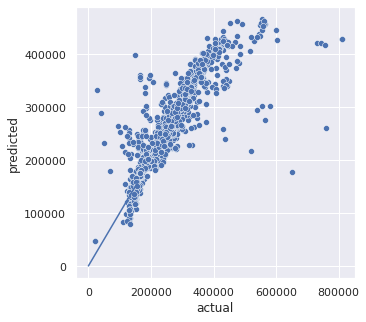

In [ ]:
plt.figure(figsize=(5, 5))
p = sns.scatterplot(x=y_test, y=y_pred)
sns.lineplot(x=[0, 160000], y=[0, 160000])
p.set_xlabel("actual")
p.set_ylabel("predicted")
plt.show()

**Linear Regression with PCA**

First, we use PCA to reduce the dimension

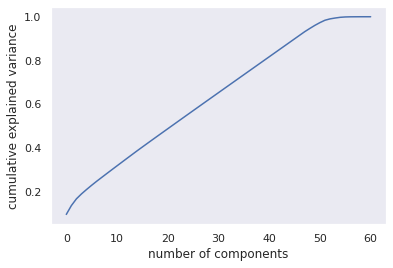

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
pca = PCA(n_components=x_train.shape[1])
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
evr = pca.explained_variance_ratio_
evr
tx_house_pc_vs_variance = np.cumsum(evr)
plt.plot(tx_house_pc_vs_variance)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
# plt.plot(evr.cumsum())
plt.show()

In [ ]:
pca = PCA(.98)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
pca.n_components_

52

Linear Regression with PCA

In [ ]:
clf = LinearRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
score = r2_score(y_test, y_pred)

print("Score:", score)

# Different error measures
print("MAE:", mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

Score: 0.7389082945997381
MAE: 20287.92496118412
MSE: 1697801708.8845592
RMSE: 41204.38943710438


After PCA, the r2 score actually goes down, from 0.768 to 0.738.

With PCA. Compare the performance with Lasso, Ridge and ElasticNet

In [ ]:
# with PCA. Lasso
from sklearn.linear_model import Lasso

clf = Lasso()
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
print("Score:", clf.score(x_test, y_test))
# Different error measures
print("MAE:", mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

Score: 0.7389070856485107
MAE: 20287.164618799972
MSE: 1697809570.3348355
RMSE: 41204.484832780465


In [ ]:
from sklearn.linear_model import Ridge

clf = Ridge()
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
print("Score:", clf.score(x_test, y_test))
# Different error measures
print("MAE:", mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

Score: 0.738908731221692
MAE: 20286.638580052153
MSE: 1697798869.6618488
RMSE: 41204.35498417429


In [ ]:
from sklearn.linear_model import ElasticNet

clf = ElasticNet()
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
print("Score:", clf.score(x_test, y_test))
# Different error measures
print("MAE:", mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

Score: 0.6846037441281696
MAE: 24051.240862500104
MSE: 2050928049.8745716
RMSE: 45287.17312743832



**Summary**

---


Similar to US weekly housing market, here we also used median sale price as label, and adopt Linear Regression to do the house price prediction for Texas. The results are shown as follows:


```
linear regression:         
         r2 = 0.7389082945997381, rmse = 41204.38943710438
linear regression with PCA and Lasso:  
         r2 = 0.7389070856485107, rmse = 41204.484832780465
linear regression with PCA and Ridge:  
         r2 = 0.738908731221692, rmse = 41204.35498417429
linear regression with PCA and ElasticNet:  
         r2 = 0.6846037441281696, rmse = 45287.17312743832
```
The best score we could get is Linear regression wih PCA and Ridge, which r2 score is 0.7389087 with an error of 41k.
All of Texas trained model's r2 score is higher than the score of US weekly housing market model's r2 score (0.55) and all rmse is much lower than the US trained model's error, which is around 127k.

---



### Austin House Price Prediction

In [ ]:
# get Austin data from tx_house_df 
austin_house_df = tx_house_df[tx_house_df['county']== 'Austin']
austin_house_df

,region_id,region_type_id,total_homes_sold,average_homes_sold,percent_homes_sold_with_price_drops,median_sale_price,median_sale_ppsf,price_drops,percent_active_listings_with_price_drops,pending_sales,median_pending_sqft,off_market_in_two_weeks,off_market_in_one_week,total_new_listings,average_new_listings,median_new_listing_price,median_new_listing_ppsf,avg_offer_to_list,average_sale_to_list_ratio,county,state,year,month,day
3974,12420,-2,539.0,539.0,0.230056,305000.0,153.007491,388.0,0.049859,619.0,1924.0,382.0,320.0,1108.0,1108.0,329800.0,159.123743,0.975786,0.987711,Austin,TX,2017,4,3
4611,12420,-2,656.0,656.0,0.175305,461000.0,242.271859,460.0,0.071987,559.0,1899.5,170.0,125.0,771.0,771.0,485000.0,252.737995,1.014331,1.018613,Austin,TX,2021,9,20
10403,12420,-2,931.0,931.0,0.344791,316500.0,154.761905,714.0,0.074827,543.0,1904.0,231.0,161.0,880.0,880.0,309000.0,156.289366,0.977284,0.984265,Austin,TX,2018,7,30
10406,12420,-2,926.0,926.0,0.208423,370000.0,183.284457,172.0,0.028753,727.0,1929.0,221.0,151.0,715.0,715.0,350000.0,186.094225,1.032492,1.000512,Austin,TX,2020,11,16
12698,12420,-2,826.0,826.0,0.378935,285000.0,147.874468,568.0,0.061154,391.0,1921.0,155.0,103.0,633.0,633.0,319900.0,158.678286,0.962784,0.982718,Austin,TX,2017,8,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537056,12420,-2,6907.0,575.0,0.450719,305353.9,153.636672,525.0,0.058814,375.0,1864.0,135.0,89.0,6914.0,576.0,312918.3,159.574772,0.976008,0.980916,Austin,TX,2018,9,24
1537058,12420,-2,7405.0,617.0,0.408521,292266.2,148.663856,631.0,0.069308,437.0,1845.0,181.0,124.0,7901.0,658.0,301925.0,153.330691,0.972113,0.981628,Austin,TX,2017,8,7
1559770,12420,-2,10746.0,895.0,0.074269,478626.2,241.039652,179.0,0.030279,869.0,1986.6,352.0,222.0,12877.0,1073.0,466632.7,233.571683,1.069272,1.081638,Austin,TX,2021,5,3
1559772,12420,-2,7711.0,642.0,0.227135,332194.7,163.697912,313.0,0.043648,555.0,1949.0,321.0,249.0,10452.0,871.0,350294.5,171.528850,0.998418,0.992856,Austin,TX,2020,2,24


Plot the median sale price in Austin County

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


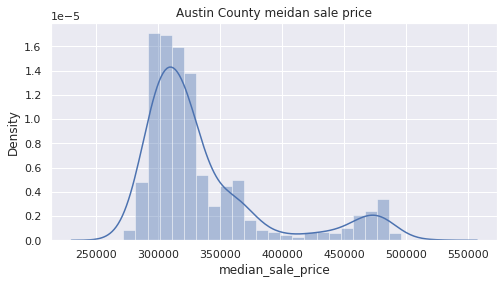

In [ ]:
plt.figure(figsize=(8,4))
plt.title("Austin County meidan sale price")
sns.distplot(austin_house_df['median_sale_price'])

Plot each month's median sale price in Austin.

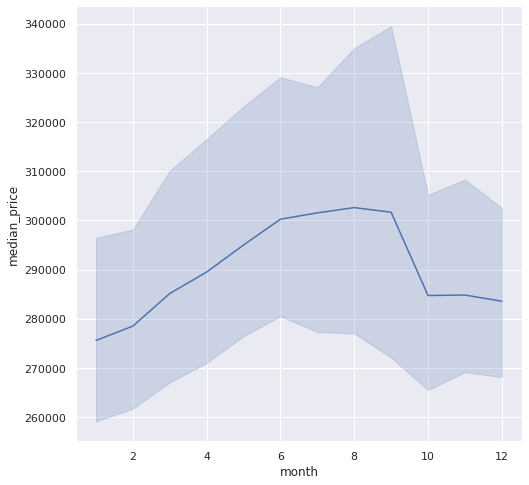

In [ ]:
plt.figure(figsize=(8, 8))

austin_price_trend = austin_house_df.groupby(['month']).agg({'median_sale_price': ['median']})
austin_price_trend.columns = ['median_price']
austin_price_trend = price_trend.reset_index()

sns.lineplot(data=austin_price_trend, x='month', y='median_price')
plt.show()

Check the influence of the median_sale_ppsf on the days on market for a home sale in Austin

<Figure size 936x864 with 0 Axes>

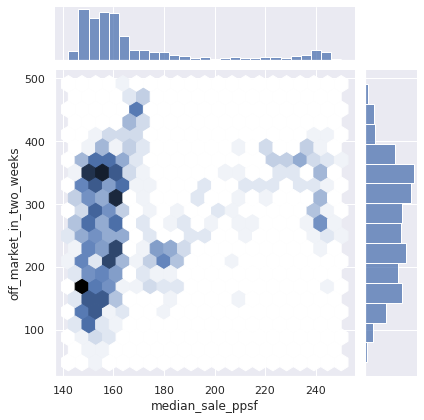

In [ ]:
plt.figure(figsize=(13, 12))
# sns.set(style ="whitegrid")
sns.jointplot(x="median_sale_ppsf", y="off_market_in_two_weeks", data=austin_house_df, kind = 'hex')
plt.show()

From above graph, we could found that house with median_sale_ppsf between 140 and 160 dollars per square feet is the most popular in Austin, which has the highest chance to sold in two weeks.

 **Train the model for Austin housing market**

Preprocess features & Standardize

In [ ]:
austin_house_df_cpy = austin_house_df.drop(columns=['average_homes_sold', 'median_sale_ppsf','county','state','region_id','region_type_id','day', 'county', 'average_sale_to_list_ratio', 'median_new_listing_price', 'median_new_listing_ppsf', 'average_new_listings'])

label = austin_house_df_cpy['median_sale_price']
features = austin_house_df_cpy.drop(columns = 'median_sale_price')
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=.2, random_state=42)


use Linear Regression without PCA

In [ ]:
clf = LinearRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
score = r2_score(y_test, y_pred)
print("Score:", score)
# Different error measures
print("MAE:", mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

Score: 0.914501384311834
MAE: 11360.205732342973
MSE: 244511386.33924207
RMSE: 15636.859861853405


Linear Regression with PCA

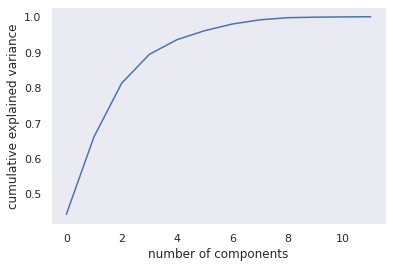

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
pca = PCA(n_components=x_train.shape[1])
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
evr = pca.explained_variance_ratio_
evr
tx_house_pc_vs_variance = np.cumsum(evr)
plt.plot(tx_house_pc_vs_variance)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [ ]:
pca = PCA(.98)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
pca.n_components_

8

Linear Regression with PCA

In [ ]:
clf = LinearRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
score = r2_score(y_test, y_pred)

print("Score:", score)

# Different error measures
print("MAE:", mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

Score: 0.8739114501330817
MAE: 13541.674530794515
MSE: 360591640.9443352
RMSE: 18989.25066832115


Then just like above, we will also compare the performance of using Lasso, Ridge, ElasticNet.

In [ ]:
# with PCA. Lasso
clf = Lasso()
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
print("Score:", clf.score(x_test, y_test))
# Different error measures
print("MAE:", mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

Score: 0.8739249499744957
MAE: 13540.98501513471
MSE: 360553033.71177477
RMSE: 18988.234086185443


In [ ]:
clf = Ridge()
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
print("Score:", clf.score(x_test, y_test))
# Different error measures
print("MAE:", mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

Score: 0.874240933309453
MAE: 13527.00050396721
MSE: 359649375.533585
RMSE: 18964.423944153565


In [ ]:
clf = ElasticNet()
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
print("Score:", clf.score(x_test, y_test))
# Different error measures
print("MAE:", mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

Score: 0.850405844022035
MAE: 13904.972928788031
MSE: 427813645.54284596
RMSE: 20683.656483872623


### In conclusion 



---
For Austin housing market, the trained models' performances are shown as follows:

```
linear regression:         
         r2 = 0.914501384311834, rmse = 15636.859861853405
linear regression with PCA and Lasso:  
         r2 = 0.8739114501330817, rmse = 18989.25066832115
linear regression with PCA and Ridge:  
         r2 = 0.874240933309453, rmse = 18964.423944153565
linear regression with PCA and ElasticNet:  
         r2 = 0.850405844022035, rmse = 20683.656483872623
```

For Austin housing market data, linear regression without PCA has the highest r2 score and lowest rmse. 

Compared to the US weekly housing market trained model (best r2 score is 0.55, rmse is 127k) and Texas housing market trained model (best r2 score is 0.7389, rmse is 41k), Austin housing model has the best performance in both r2 score and rmse. This phenomenon may sterms from the fact that there exists huge differences in housing prices across different regions and using national or regional data to predict house price may sometimes be inaccurate. 



---



